<a href="https://colab.research.google.com/github/SonawaneAjay/data-science-portfolio/blob/master/time-series-forecasting/covid19_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vumonic Datalabs - Internship** 
### Assignment 5
### Name: Ajay Sonawane

## **Problem Statement**
Using the covid-19 dataset predict number of confirmed cases, recovered cases and deaths  

In [ ]:
#Importing basic libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Forecasting data of confiremd cases
We will now forecast the data using various models and the forecast values for future dates with the best model

In [ ]:
#Reading data of confirmed cases
df = pd.read_excel('/content/Cleaned_clubbed_data_covid.xlsx', sheet_name='Confirmed_cases')

In [ ]:
df.head()

,Dates,Confirmed
0,2020-01-22,555
1,2020-01-23,99
2,2020-01-24,287
3,2020-01-25,493
4,2020-01-26,684


In [ ]:
df.shape

(174, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dates      174 non-null    datetime64[ns]
 1   Confirmed  174 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [ ]:
df.set_index('Dates', inplace=True)

In [ ]:
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', name='Dates', length=174, freq=None)

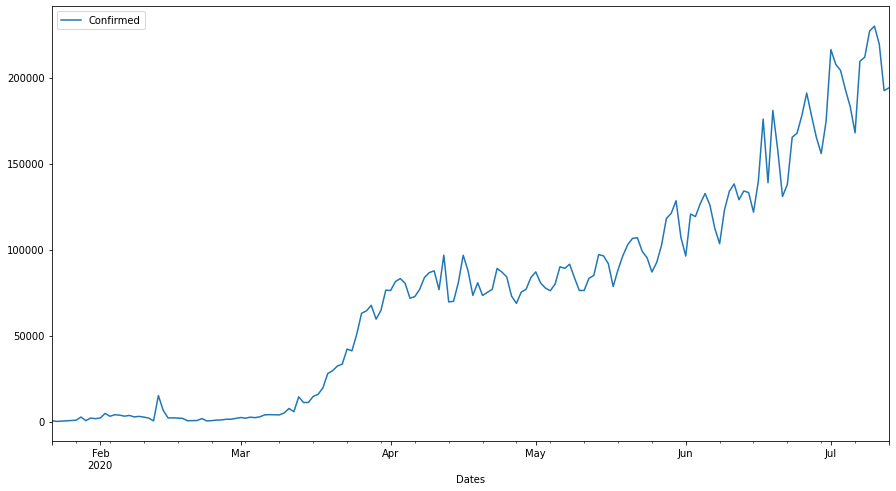

In [ ]:
df.plot(figsize=(15, 8))

In [ ]:
#Out of 174 records, we are training our dataset with 160 records
#And will test the data with remaining 14 records

train = df[0:160] 
test = df[159:]

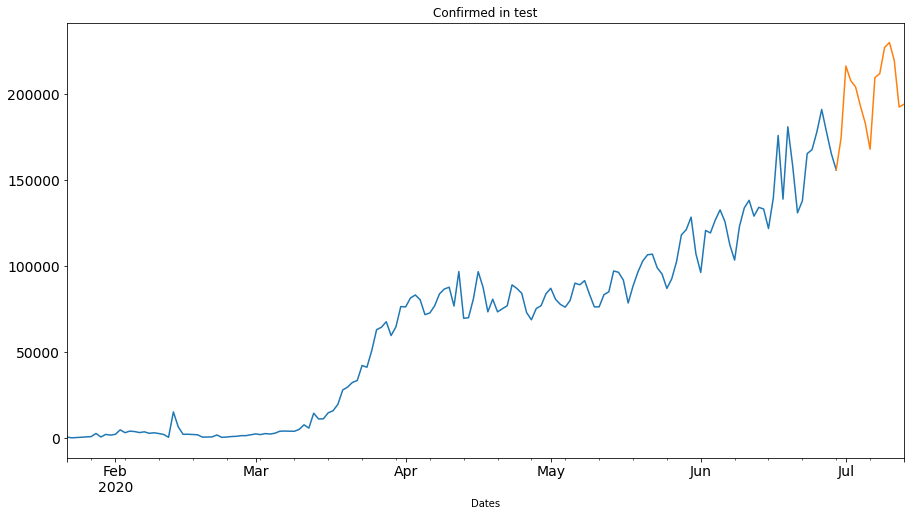

In [ ]:
train.Confirmed.plot(figsize=(15,8), title= 'Confirmed in Train', fontsize=14)
test.Confirmed.plot(figsize=(15,8), title= 'Confirmed in test', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

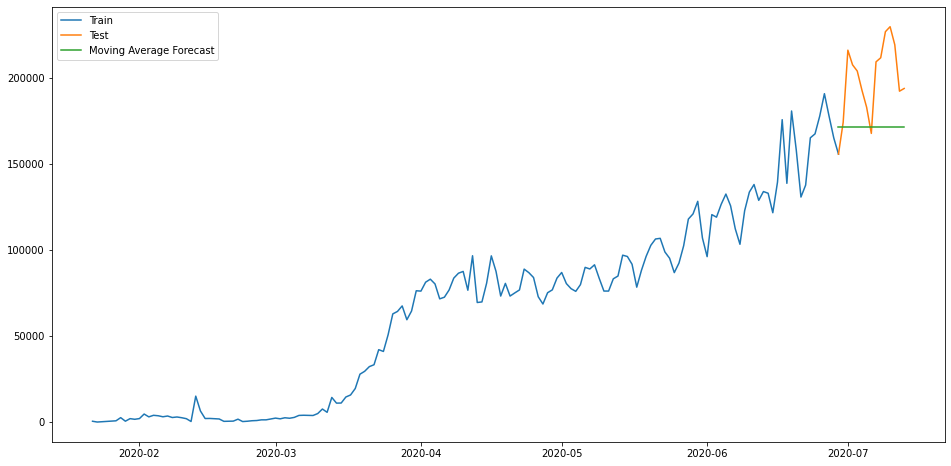

In [ ]:
#Model 1: Moving Average Model for Forecasting confirmed cases

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Confirmed'].rolling(7).mean().iloc[-1]

plt.figure(figsize=(16,8))
plt.plot(train['Confirmed'], label='Train')
plt.plot(test['Confirmed'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Confirmed, y_hat_avg.moving_avg_forecast))
print("RMSE : ",rms)

RMSE :  34670.24284710954


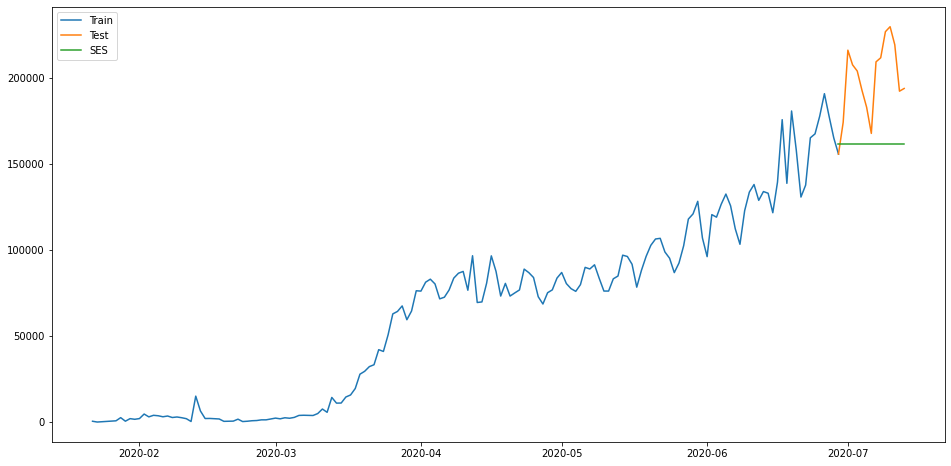

In [ ]:
#Model 2: Simple Exponential Smoothing Model for Forecasting confirmed cases

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Confirmed'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Confirmed'], label='Train')
plt.plot(test['Confirmed'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Confirmed, y_hat_avg.SES))
print(rms)

42677.56956218453


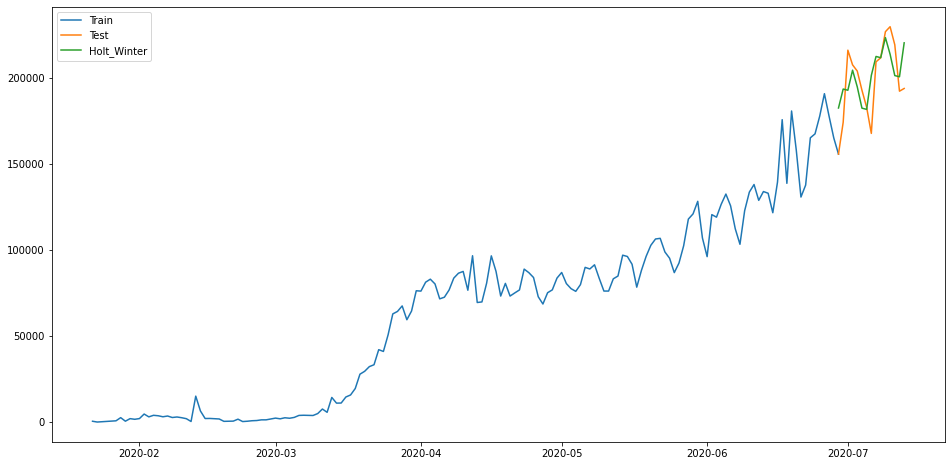

In [ ]:
#Model 3: Holt winter model for Forecasting confirmed cases

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Confirmed']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot( train['Confirmed'], label='Train')
plt.plot(test['Confirmed'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Confirmed, y_hat_avg.Holt_Winter))
print(rms)

17025.38276408644


In [ ]:
test

,Confirmed
Dates,
2020-06-29,155869
2020-06-30,174369
2020-07-01,216289
2020-07-02,207758
2020-07-03,204160
2020-07-04,193028
2020-07-05,183082
2020-07-06,167900
2020-07-07,209506


**Using the Holt winter model we will now predict for fututre 30 days**

In [ ]:
#Generating next 30 dates
from pandas.tseries.offsets import DateOffset
future_dates = [test.index[-1] + DateOffset(days=x) for x in range(1,30)]

future_dataset = pd.DataFrame(index = future_dates[0:], columns = test.columns)

future_df = pd.concat([test, future_dataset])
future_df.tail(30)

,Confirmed
2020-07-13,194034
2020-07-14,NaN
2020-07-15,NaN
2020-07-16,NaN
2020-07-17,NaN
2020-07-18,NaN
2020-07-19,NaN
2020-07-20,NaN
2020-07-21,NaN
2020-07-22,NaN


In [ ]:
future_df.shape

(44, 1)

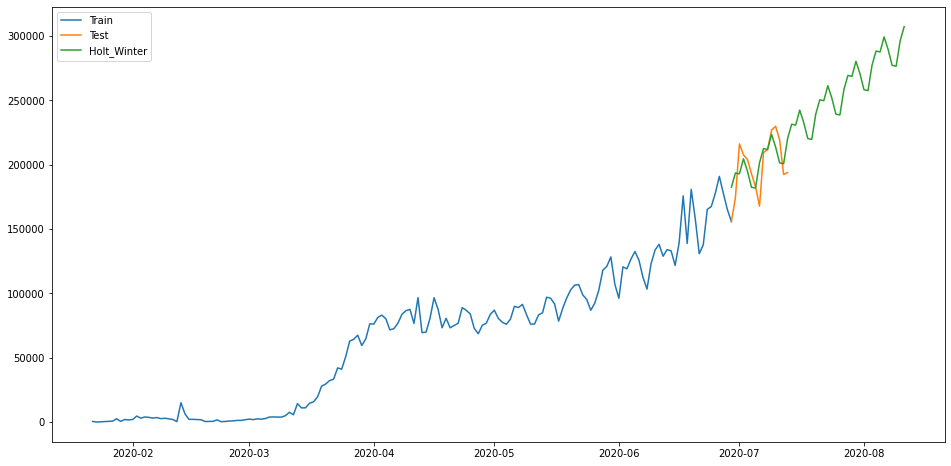

In [ ]:
#Forecasting using the next 30 days

y_hat_avg = future_df.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Confirmed']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(future_df))

plt.figure(figsize=(16,8))
plt.plot( train['Confirmed'], label='Train')
plt.plot(future_df['Confirmed'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
#printing values that the model have predicted
y_hat_avg['Holt_Winter'].iloc[15:]

2020-07-14    231579.961870
2020-07-15    230876.966218
2020-07-16    242557.822873
2020-07-17    232886.467498
2020-07-18    220470.987326
2020-07-19    219768.957743
2020-07-20    239504.373953
2020-07-21    250523.910056
2020-07-22    249820.914404
2020-07-23    261501.771060
2020-07-24    251830.415684
2020-07-25    239414.935512
2020-07-26    238712.905930
2020-07-27    258448.322139
2020-07-28    269467.858242
2020-07-29    268764.862590
2020-07-30    280445.719246
2020-07-31    270774.363870
2020-08-01    258358.883699
2020-08-02    257656.854116
2020-08-03    277392.270325
2020-08-04    288411.806428
2020-08-05    287708.810776
2020-08-06    299389.667432
2020-08-07    289718.312057
2020-08-08    277302.831885
2020-08-09    276600.802302
2020-08-10    296336.218511
2020-08-11    307355.754614
Name: Holt_Winter, dtype: float64

# Forecasting data of recovered cases
We will now forecast the data using Holt winter model directly

In [ ]:
#Reading data of recoverd cases
df = pd.read_excel('/content/Cleaned_clubbed_data_covid.xlsx', sheet_name='Recovered_cases')

In [ ]:
df.head()

,Dates,Recovered
0,2020-01-22,28
1,2020-01-23,2
2,2020-01-24,6
3,2020-01-25,3
4,2020-01-26,13


In [ ]:
df.shape

(174, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dates      174 non-null    datetime64[ns]
 1   Recovered  174 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [ ]:
df.set_index('Dates', inplace=True)

In [ ]:
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', name='Dates', length=174, freq=None)

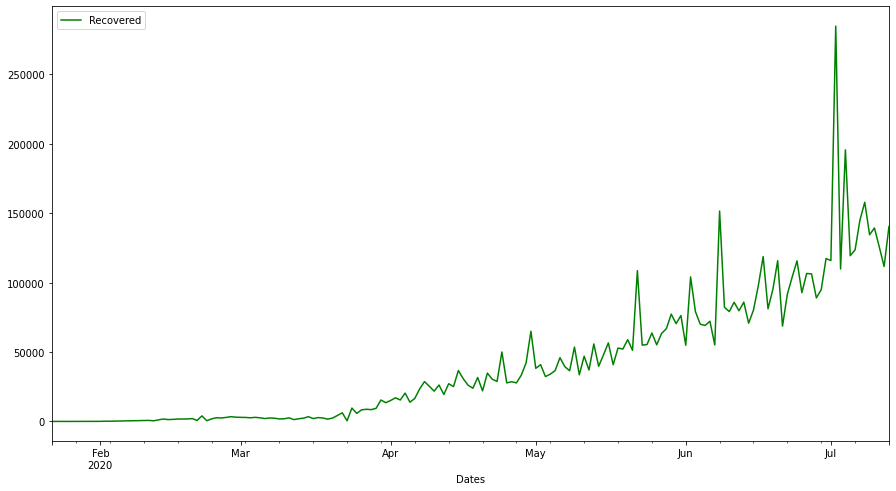

In [ ]:
df.plot(figsize=(15, 8), color="Green")

In [ ]:
#Out of 174 records, we are training our dataset with 170 records
#And will test the data with remaining 4 records

train = df[0:170] 
test = df[169:]

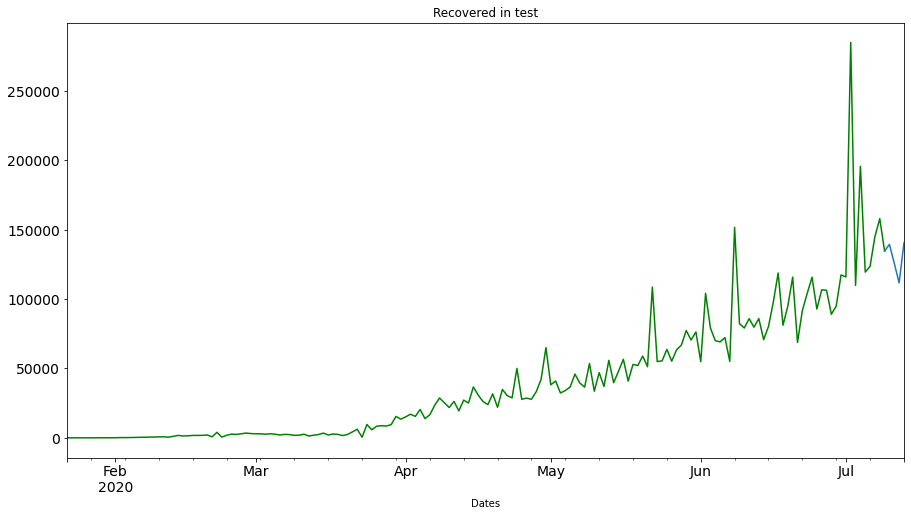

In [ ]:
train.Recovered.plot(figsize=(15,8), title= 'Recovered in Train', fontsize=14, color="Green")
test.Recovered.plot(figsize=(15,8), title= 'Recovered in test', fontsize=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


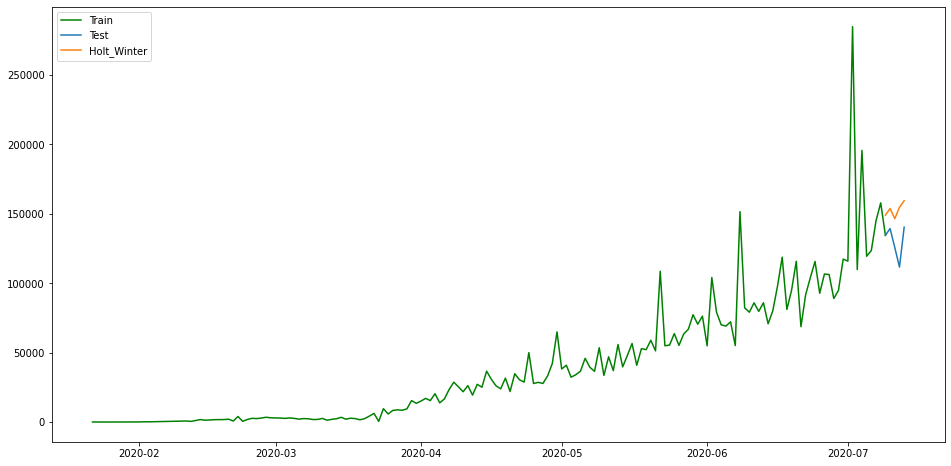

In [ ]:
#Model 1: Holt winter model for Forecasting recovered cases

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Recovered']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot( train['Recovered'], label='Train', color="Green")
plt.plot(test['Recovered'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Recovered, y_hat_avg.Holt_Winter))
print(rms)

24779.63065124636


In [ ]:
#Generating next 30 dates
from pandas.tseries.offsets import DateOffset
future_dates = [test.index[-1] + DateOffset(days=x) for x in range(1,30)]

future_dataset = pd.DataFrame(index = future_dates[0:], columns = test.columns)

future_df = pd.concat([test, future_dataset])
future_df.tail(30)

,Recovered
2020-07-13,140412
2020-07-14,NaN
2020-07-15,NaN
2020-07-16,NaN
2020-07-17,NaN
2020-07-18,NaN
2020-07-19,NaN
2020-07-20,NaN
2020-07-21,NaN
2020-07-22,NaN


In [ ]:
future_df.shape

(34, 1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


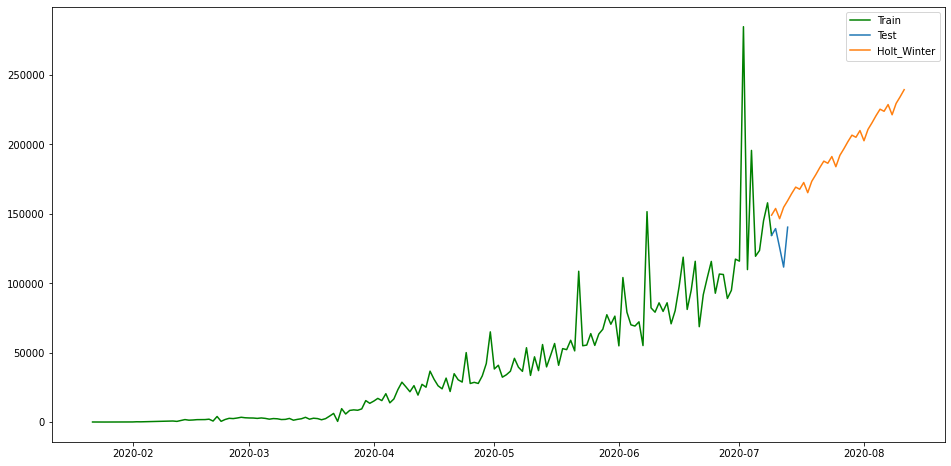

In [ ]:
#Forecasting using the next 30 days

y_hat_avg = future_df.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Recovered']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(future_df))

plt.figure(figsize=(16,8))
plt.plot( train['Recovered'], label='Train', color="Green")
plt.plot(future_df['Recovered'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
y_hat_avg['Holt_Winter'].iloc[5:]

2020-07-14    164616.311970
2020-07-15    169268.542238
2020-07-16    167752.236173
2020-07-17    172593.112515
2020-07-18    165250.591492
2020-07-19    173445.641880
2020-07-20    178209.292821
2020-07-21    183334.231300
2020-07-22    187986.461568
2020-07-23    186470.155504
2020-07-24    191311.031845
2020-07-25    183968.510822
2020-07-26    192163.561211
2020-07-27    196927.212151
2020-07-28    202052.150631
2020-07-29    206704.380898
2020-07-30    205188.074834
2020-07-31    210028.951175
2020-08-01    202686.430152
2020-08-02    210881.480541
2020-08-03    215645.131482
2020-08-04    220770.069961
2020-08-05    225422.300229
2020-08-06    223905.994164
2020-08-07    228746.870506
2020-08-08    221404.349482
2020-08-09    229599.399871
2020-08-10    234363.050812
2020-08-11    239487.989291
Name: Holt_Winter, dtype: float64

# Forecasting data of deaths reported
We will now forecast the data using Holt winter model directly

In [ ]:
#Reading data of deaths reported
df = pd.read_excel('/content/Cleaned_clubbed_data_covid.xlsx', sheet_name='Deaths_reported')

In [ ]:
df.head()

,Dates,Deaths
0,2020-01-22,17
1,2020-01-23,1
2,2020-01-24,8
3,2020-01-25,16
4,2020-01-26,14


In [ ]:
df.shape

(174, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   174 non-null    datetime64[ns]
 1   Deaths  174 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [ ]:
df.set_index('Dates', inplace=True)

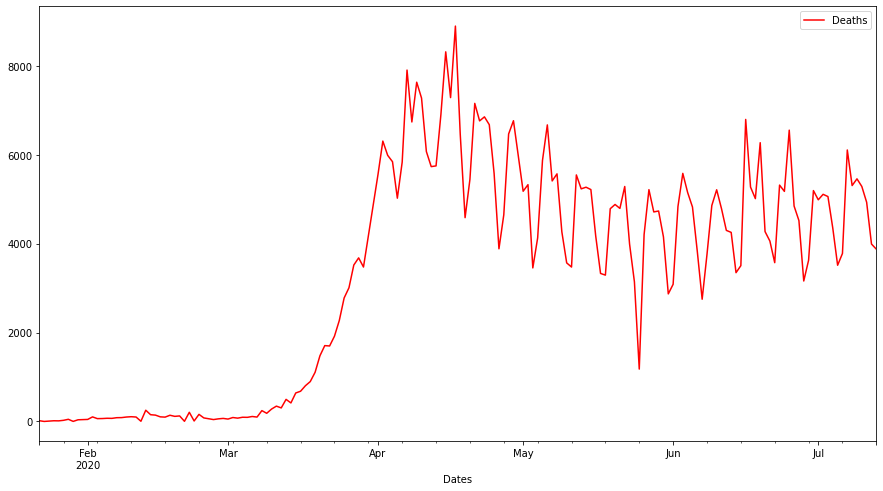

In [ ]:
df.plot(figsize=(15, 8), color="Red")

In [ ]:
#Out of 174 records, we are training our dataset with 160 records
#And will test the data with remaining 14 records

train = df[0:160] 
test = df[159:]

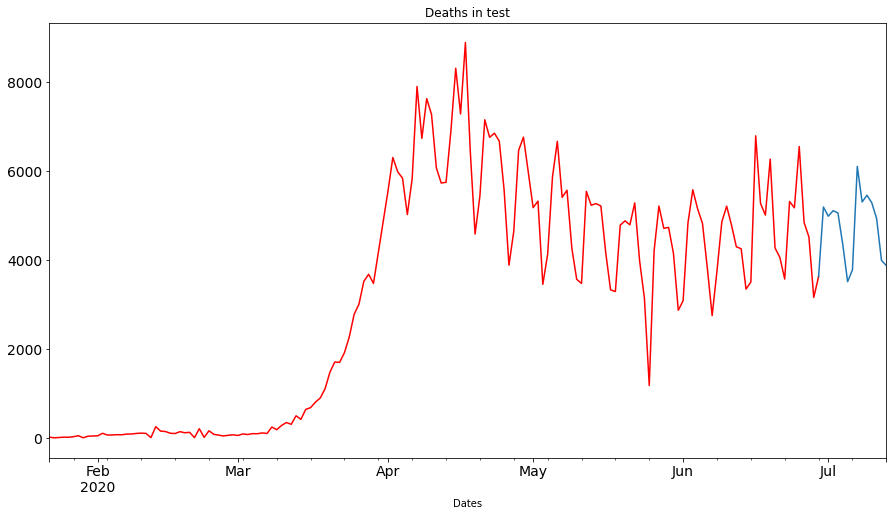

In [ ]:
train.Deaths.plot(figsize=(15,8), title= 'Deaths in Train', fontsize=14, color="Red")
test.Deaths.plot(figsize=(15,8), title= 'Deaths in test', fontsize=14)
plt.show()

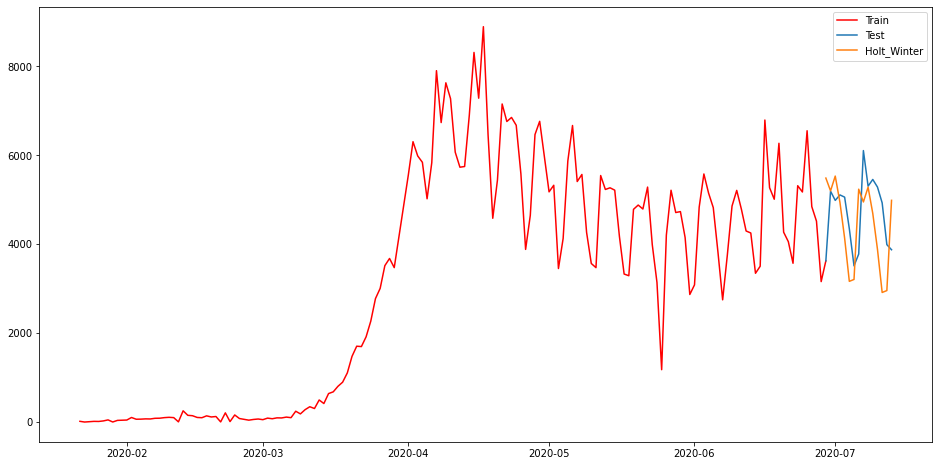

In [ ]:
#Model 1: Holt winter model for Forecasting deaths reported

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Deaths']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot( train['Deaths'], label='Train', color="Red")
plt.plot(test['Deaths'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Deaths, y_hat_avg.Holt_Winter))
print(rms)

1110.599670641546


In [ ]:
#Generating next 30 dates
from pandas.tseries.offsets import DateOffset
future_dates = [test.index[-1] + DateOffset(days=x) for x in range(1,30)]

future_dataset = pd.DataFrame(index = future_dates[0:], columns = test.columns)

future_df = pd.concat([test, future_dataset])
future_df.tail(30)

,Deaths
2020-07-13,3875
2020-07-14,NaN
2020-07-15,NaN
2020-07-16,NaN
2020-07-17,NaN
2020-07-18,NaN
2020-07-19,NaN
2020-07-20,NaN
2020-07-21,NaN
2020-07-22,NaN


In [ ]:
future_df.shape

(44, 1)

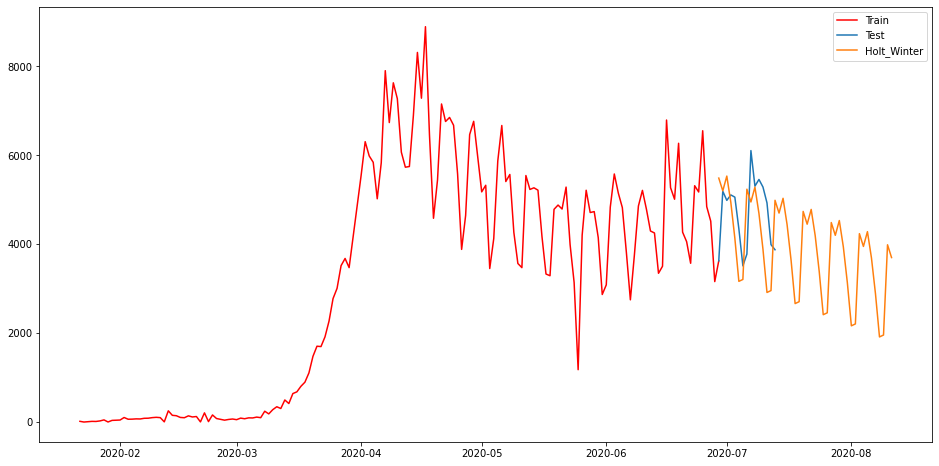

In [ ]:
#Forecasting using the next 30 days

y_hat_avg = future_df.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Deaths']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(future_df))

plt.figure(figsize=(16,8))
plt.plot( train['Deaths'], label='Train', color="Red")
plt.plot(future_df['Deaths'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
y_hat_avg['Holt_Winter'].iloc[15:]

2020-07-14    4699.579218
2020-07-15    5031.801207
2020-07-16    4441.554216
2020-07-17    3635.438245
2020-07-18    2664.556082
2020-07-19    2707.259123
2020-07-20    4736.748094
2020-07-21    4449.607589
2020-07-22    4781.829578
2020-07-23    4191.582587
2020-07-24    3385.466616
2020-07-25    2414.584453
2020-07-26    2457.287494
2020-07-27    4486.776464
2020-07-28    4199.635960
2020-07-29    4531.857949
2020-07-30    3941.610958
2020-07-31    3135.494987
2020-08-01    2164.612823
2020-08-02    2207.315865
2020-08-03    4236.804835
2020-08-04    3949.664331
2020-08-05    4281.886319
2020-08-06    3691.639328
2020-08-07    2885.523358
2020-08-08    1914.641194
2020-08-09    1957.344236
2020-08-10    3986.833206
2020-08-11    3699.692702
Name: Holt_Winter, dtype: float64